In [114]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import models.road_network.create_graph as cg 
import simulation.simulate_routes as sr 
import models.vehicle_models.battery_deg as bd 

from pprint import pprint


In [115]:
with open("models/vehicle_models/static_data.json", "r") as file:
    static_data = json.load(file)
with open("models/vehicle_models/vehicle_data.json", "r") as file:
    vehicle_data = json.load(file)
with open("models/vehicle_models/battery_data.json", "r") as file:
    battery_data = json.load(file)

with open("./data_collection/data/large_net/fixed_large_dis_data.json", "r") as file:
    normal_map_data = json.load(file)
with open("./data_collection/data/flat_net/flat_map_data.json", "r") as file:
    flat_map_data = json.load(file)
with open("./data_collection/data/smooth_net/smooth_map_data.json", "r") as file:
    smooth_map_data = json.load(file)

road_network_file = './data_collection/data/large_net/large_edge_data.csv' 
road_df = pd.read_csv(road_network_file)

In [116]:
OCV = battery_data["OCV"]
capacity = battery_data["Capacity"]
R_int = battery_data["R_internal"]
motor_eff = vehicle_data["motor_eff"]


graph = cg.create_osmnx_compatible_graph(road_network_file, debug = False)

In [117]:
weights_dict_opt = {'incline_weight': 2.2845804889825976,
                        'max_incline_weight': 0.889801834962223,
                        'distance_weight': 5.296244459829336,
                        'zero_start_weight': 15.005629167085328}
test_set = [(5869437977, 2472524813), (10576730961, 6319406260), (1572010453, 280005573), (279742579, 6226125769), (6240370201, 956598303), (8270165433, 10658471691), (26070212, 4585717387), (26165150, 25991705), (843463020, 21529854), (26217250, 6058898375), (26151645, 26009744), (616942564, 10739447463), (2279742847, 4161700249), (3022068836, 4484476646), (26425162, 832782058), (1224377530, 732379115), (287227092, 10739497719), (1421871648, 26218274), (8408442976, 5409904699), (26165127, 2136439848), (26165152, 8007840936), (26425162, 4773779116), (465205538, 5914734949), (6148469042, 5312527696), (10739447463, 1970773874), (26466657, 830454815), (393143656, 963961960), (2892455961, 1751865178), (280010298, 3356986279), (26190457, 1097417876), (972935740, 2334396122), (26151656, 10751814850), (21037692, 26190497), (1022548134, 6433994021), (2460332277, 26170081), (26070211, 2189622273), (26165124, 3380845801), (2565672649, 26217254), (26170079, 966845899), (430269402, 4341744548), (966845899, 6824198862), (26165113, 430191416), (1975788450, 11865591910), (5885840414, 26160413), (10794808742, 26165101), (1436391229, 1885230900), (921648225, 1698355), (2971357803, 5569951805), (4590641788, 26164991), (2076171040, 4117553226), (26190507, 6192559883), (280003190, 17585264), (6831409058, 430666809), (26104434, 280003164), (4688567213, 5914735438), (10751814850, 4032728650), (26215522, 5869437927), (826838284, 1022548134), (1514665700, 5885840424), (5569951806, 430180490), (830599323, 826838284), (1203722130, 956598326), (840489772, 26149463), (393143659, 6343600441), (1036630663, 6157602586), (21531984, 830454725), (1097417905, 5879879532), (832782058, 5489858552), (1224377511, 3582048494), (981814755, 17705472), (2006482485, 26218283), (21529957, 5359925907), (280008965, 853556886), (280005484, 26151656), (2539000576, 367036281), (2214737730, 1986278327), (6071834338, 7065555301), (21032139, 6841851183), (6502743302, 26167335), (1692451190, 1052953636), (25954711, 18483296), (26190486, 26170079), (6824198859, 5359925907), (840488244, 21042461), (3033658145, 6343600442), (1969548497, 21310297), (1885230900, 2006482485), (4117553241, 4585717388), (17486537, 26165135), (2757541600, 26164040), (2189621006, 5438285327), (832782075, 1876656276), (1751865178, 21529949), (963961960, 891026747), (5359649074, 826838286), (1108314810, 826838271), (1419000235, 1108314693), (2076171054, 1422365759), (21031938, 2460332280), (1876656276, 830454826), (17705281, 4239199047), (435846331, 6058290567), (2892455930, 2472524832), (1775501534, 1044211088), (2565672654, 5308359053), (26164992, 2892455961), (4427052243, 3584572356), (25954712, 3001245508), (26104428, 17585126), (3356986279, 2298696536), (26160414, 840488244), (4906713454, 17705478), (430666457, 430672363), (4688614009, 1097417876), (280014599, 3101157631), (4565880110, 2565672658), (1127885350, 972935740), (26165128, 5869437927), (26170082, 26165099), (9662482584, 5359925908), (10751814837, 5941071864), (10283016082, 26165123), (4161700263, 26217283), (3355052507, 26070201), (12106287798, 1106626289), (6226125473, 242790322), (430180490, 21031938), (26151656, 5914735493), (430666918, 975789095), (21529953, 430668628), (3001245508, 26164992), (974624804, 6363663015), (26104404, 5517343420), (26070211, 6071834361), (26009748, 963961960), (10283016082, 26217224), (26009770, 6058981816), (5879879551, 4585717384), (17705489, 26104496), (4374643943, 5885840399), (26190468, 26170085), (21529896, 26165152), (4117553235, 21309758), (26166638, 7549842419), (8891802370, 17585143), (2297536205, 26165111), (4117553207, 26190520), (7192678490, 3584572365), (10935231431, 26215514), (17705281, 10935221495), (843463020, 26190490), (26150465, 4765573948), (1970090305, 26150474), (5410382639, 5879879549), (943619155, 1692444892), (10576730953, 2882717824), (1127885318, 26190520), (10794781027, 26164991), (280010106, 1968626170), (430685793, 4422870561), (3356986401, 4117553207), (1970773874, 279343253), (8007840937, 1227827624), (4117553235, 1913249541), (2279663502, 10935221491), (26190505, 6157602586), (4590641787, 26165120), (2004050917, 430663971), (21529896, 1227136497), (246189562, 1692451172), (26151648, 1969548497), (430179926, 6363663015), (833216544, 3022068836), (21031941, 26149467), (26165138, 10794781024), (430685705, 26104404), (26070189, 1422338809), (974883464, 21529980), (17585270, 12106877508), (1481290103, 2279682192), (6226125475, 26215516), (1108336044, 7737202757), (6502743303, 29175615), (3023519166, 3584572371), (4239199047, 10751814840), (6824198859, 21310297), (10751814837, 430179935), (2136439848, 430666745), (6319406265, 8898669707), (18483652, 2565672657), (686400062, 8265614351), (3001245522, 830454660), (2334396196, 25954711), (2941119306, 7066753267), (25954684, 26165100), (4765573948, 291583393), (26070240, 1203722130), (5274222101, 17487066), (26170075, 2279682197), (4585717385, 1127885291)]

In [118]:
routes_study = [[1692451158, 963961964, 26104427, 26104426, 26104434, 5438285327, 963961980, 2298696536, 26159335, 17585146, 957754269, 17585143, 2971357803, 430715668, 246192208, 21529979, 830599351, 430178844, 17585126, 1130492591, 430269402, 430270406, 26070202, 17585264, 243078541, 465205538, 2892455909, 853556892, 26215513, 26215518, 26215519, 2882717824, 26170080, 26170079, 5517343419, 26170082, 2472524812], [5403763153, 26164024, 279748248, 21529850, 5403893512, 279750117, 5410382639, 1108272823, 921648225, 18483657, 1692983943, 26137502, 2279682192, 18483652, 2554328819, 11664929740, 2565672657, 2565672654, 2565672649, 1751865191, 264675440, 264675410, 12057484711, 21529852, 842596956, 1481290103, 1227827624, 280004730, 393143659, 393143660, 832782073, 280003190, 289533823, 832782091, 430668440, 430668529, 430668628, 6268584231, 6268584230], [26165150, 242790325, 26165151, 1250715235, 10935221426, 26167335, 10935221491, 10935221495, 26167336, 10935231429, 10935231459, 26165130, 4150116225, 9568203082, 9568203077, 26165128, 26165125, 26165127, 4032728626, 26165148, 12106877508, 26215514, 26215519, 2882717824, 26170080, 4590641787, 26215521, 1084706771, 826838271, 26164991, 25991705], [5885840414, 5885840413, 280005555, 280005373, 280005990, 280005920, 280004730, 393143659, 393143660, 832782073, 280003190, 289533823, 832782091, 430668440, 430668529, 26217243, 25954711, 25954712, 1492538770, 2983539832, 430191112, 26070181, 26070209, 3357011075, 26070175, 26070171, 26070172, 26218282, 830599275, 6148493657, 26218275, 26218277, 6058981816, 26218283, 26217224, 1052953667, 21531986, 6071834362, 830454760, 26160416, 26160413], [6831409058, 279376210, 1894277039, 279376258, 1692451189, 279763787, 1692451164, 5156146590, 1692451170, 26104427, 963961964, 963961974, 26104428, 293271070, 1968626170, 1968626161, 1968626134, 26104404, 26104406, 982910537, 4592591839, 430665519, 247910788, 4592735635, 4592735651, 4592735647, 430663971, 17487066, 4346554544, 462977732, 3582048494, 832782020, 4161700259, 832782047, 1227827712, 4161700267, 1227827732, 18483301, 430666878, 280003244, 430666457, 5914735494, 430666743, 430666745, 430666809], [9662482584, 120211718, 26164045, 1108314693, 5409904699, 5410028366, 975865762, 4773779116, 4688614009, 4773779115, 5410295535, 5156146590, 1692451164, 279763787, 1692451189, 279376258, 1894277039, 279376210, 6831409058, 6824198862, 6824198859, 6824198857, 5941071863, 164263636, 6841840971, 6831733177, 5359925910, 5359925909, 5359925908], [943619155, 26151656, 21309756, 1224607038, 358542563, 21309758, 5211306824, 21659883, 1080015168, 21309760, 5211305714, 26167352, 26167353, 3033658145, 26167347, 1250715152, 4426224306, 26165151, 1250715235, 10935221426, 26167335, 10935221491, 10935221495, 26167336, 10935231429, 10935231459, 26165130, 1692444945, 6835942106, 1692444905, 10751398349, 1692444892], [2800145702, 2800145580, 26165101, 26165100, 26149478, 26165115, 1421871685, 26165120, 26165121, 7737202755, 26165125, 26165127, 4032728626, 26165148, 12106877508, 26215514, 26215513, 26215512, 5519467253, 1022548134, 25991707, 26070190, 26070191, 26070193, 26070196, 1130492610, 26070209, 26070181, 430191112, 26070211, 430191416, 21529973, 26190463, 26190470, 26190461, 26190457, 26190455, 8233623540, 26190486, 299245722, 299245720, 260968662, 280003250, 280003244, 430666457, 280003169, 280003164, 280014599, 5885840424], [6071834341, 6071834338, 26160413, 26218847, 26160414, 26164991, 826838271, 1084706771, 26215521, 4590641787, 26170080, 2882717824, 26215519, 26215514, 12106877508, 26165148, 4032728634], [4585717385, 4585717386, 4585717387, 4585717379, 1986278336, 1986278333, 26070175, 26070171, 26070172, 26218282, 830599275, 6148493657, 26218275, 25991706, 1022548104, 26215527, 26215525, 26215522, 826838286, 5517369465, 2882717824, 26170080, 26170079, 5517343419, 26170082, 2472524812, 1035769622, 17585269, 2472524823, 2539000579, 4858273896, 26149478, 26165115, 6723460483, 1421871703, 26165116, 21309828, 840489772, 1139494217, 3380845801, 3380845804, 158387705, 1587196507, 1127885310, 1127885291], [12057484711, 264675410, 264675440, 2565672651, 18483296, 4346554544, 4351712303, 4346554546, 17487067, 17487069, 1572010451, 4346554572, 11865591910, 981814755, 17585135, 1775501535, 2207401618, 26070232, 830599329, 430180427, 17585126, 1130492591, 430269402, 430270406, 26070202, 17585264, 243078541, 465205538, 2892455909, 853556892, 26215513, 26215518, 26215519, 2882717824], [4117553235, 4117553234, 2004050931, 2004050917, 4117553202, 2004050909, 26165138, 1692444887, 2004051104, 2004051110, 6058290567, 1692444945, 26165130, 10935231459, 10935231429, 26167336, 10935221495, 10935221491, 26167335, 10935221426, 1250715235, 26165151, 4426224306, 1250715152, 26167347, 3033658145, 26167353, 26167352, 5211305714, 21309760, 1080015168, 21659883, 5211306824, 21309758], [8891802370, 8891802368, 26151644, 21309761, 1080015179, 3033658141, 26167353, 3033658145, 26167347, 1250715152, 4426224306, 26165151, 1250715235, 10935221426, 26167335, 10935221491, 10935221495, 26167336, 10935231429, 10935231459, 26165130, 1692444945, 6058290567, 2004051110, 3684809154, 26165133, 430272424, 4117553241, 4117553234, 2004050931, 2004050917, 4117553202, 2004050909, 26165138, 26165146, 1969856232, 1969856230, 2971357803, 17585143], [10576730961, 10576730953, 1079987058, 26151648, 2460332280, 8891802368, 26151644, 21309761, 1080015179, 3033658141, 26167353, 3033658145, 26167347, 1250715152, 4426224306, 26165151, 1250715235, 10935221426, 26167335, 10935221491, 10935221495, 26167336, 10935231429, 10935231459, 26165130, 4150116225, 9568203082, 9568203077, 26165128, 26165125, 26165127, 4032728626, 26165148, 12106877508, 26215514, 26215513, 26215512, 5519467253, 1022548134, 25991707, 26070190, 26070189, 26218282, 26070172, 1015346553, 6326507990, 1015346535, 26009749, 4589377096, 6319406261, 6319406260], [5869437977, 5869437928, 5869437976, 26070181, 26070209, 3357011075, 26070175, 26070171, 26070172, 26218282, 830599275, 6148493657, 26218275, 25991706, 1022548104, 26215527, 26215525, 26215522, 826838286, 5517369465, 2882717824, 26170080, 26170079, 5517343419, 26170082, 2472524812, 2472524813], [10576730961, 10576730953, 1079987058, 26151648, 2460332280, 8891802368, 26151644, 21309761, 1080015179, 3033658141, 26167353, 3033658145, 26167347, 1250715152, 4426224306, 26165151, 1250715235, 10935221426, 26167335, 10935221491, 10935221495, 26167336, 10935231429, 10935231459, 26165130, 4150116225, 9568203082, 9568203077, 26165128, 26165125, 26165127, 4032728626, 26165148, 12106877508, 26215514, 26215513, 26215512, 5519467253, 1022548134, 25991707, 26070190, 26070189, 26218282, 26070172, 1015346553, 6326507990, 1015346535, 26009749, 4589377096, 6319406261, 6319406260], [1572010453, 2990144218, 1881518938, 536801205, 1692451190, 1692451188, 1692451184, 1692451180, 616942559, 26104474, 1692451170, 26104427, 963961964, 963961974, 26104428, 293271070, 1968626170, 1968626161, 1968626134, 26104404, 26104406, 982910537, 4592591839, 430665519, 2554338033, 430665624, 18483009, 11664929738, 11664929740, 2565672657, 2565672654, 2565672649, 1751865191, 264675440, 264675410, 12057484711, 21529852, 21031941, 21031942, 280004750, 280005573], [279742579, 26174095, 1876656258, 1876656276, 4346557385, 1108272499, 975865764, 279750117, 975865762, 4773779116, 4688614009, 4773779115, 5410295535, 5156146590, 1692451164, 279763787, 1692451189, 279376258, 1894277039, 279376210, 11681655985, 6814693380, 29172767, 536801204, 26151676, 2335487861, 26165154, 26165153, 10795195540, 26165152, 1250715235, 26165151, 242790325, 6226125770, 6226125769], [6240370201, 5914862032, 2279742847, 61316516, 871619402, 21529854, 5292486012, 21529852, 12057484711, 264675410, 264675440, 2565672651, 11497414273, 264675443, 2565672658, 430665624, 2554338033, 430665519, 4592591839, 982910537, 26104406, 974590436, 2205701895, 974590455, 974856473, 956598303], [8270165433, 8265614352, 1975788450, 5914649930, 26215512, 26215513, 26215514, 12106877508, 26165148, 4032728626, 26165127, 26165125, 7737202755, 26165121, 10658471700, 10658471691], [26070212, 430672321, 26070224, 21529976, 891026768, 21529973, 430191416, 26070211, 430191112, 26070181, 26070209, 3357011075, 26070175, 26070171, 26070172, 26218282, 26070189, 4585717379, 4585717387], [26165150, 242790325, 26165151, 1250715235, 10935221426, 26167335, 10935221491, 10935221495, 26167336, 10935231429, 10935231459, 26165130, 4150116225, 9568203082, 9568203077, 26165128, 26165125, 26165127, 4032728626, 26165148, 12106877508, 26215514, 26215519, 2882717824, 26170080, 4590641787, 26215521, 1084706771, 826838271, 26164991, 25991705], [843463020, 843463019, 843463024, 2823657862, 17705485, 21037692, 26103649, 444363558, 26009751, 17705489, 21529963, 5312151796, 21529964, 25954710, 5879879532, 5879879516, 830454679, 25954707, 25954711, 26217243, 430668529, 430668440, 832782091, 289533823, 280003240, 260968662, 280003250, 280003244, 430666457, 280003169, 280003164, 280014599, 280005484, 21031938, 21529852, 5292486012, 21529854], [26217250, 26217246, 26217243, 25954711, 25954712, 1492538770, 2983539832, 430191112, 26070181, 26070209, 3357011075, 26070175, 26070171, 26070172, 1015346553, 26009748, 830599260, 6058898376, 6058898375], [26151645, 26466672, 26151644, 21309761, 1080015179, 3033658141, 26167353, 3033658145, 26167347, 1250715152, 4426224306, 26165151, 1250715235, 10935221426, 26167335, 10935221491, 10935221495, 26167336, 10935231429, 10935231459, 26165130, 4150116225, 9568203082, 9568203077, 26165128, 26165125, 26165127, 4032728626, 26165148, 12106877508, 26215514, 26215513, 26215512, 5519467253, 1022548134, 25991707, 26070190, 26070189, 26218282, 26070172, 1015346553, 26009748, 830599260, 26009757, 2820675448, 6317196630, 26217285, 26009742, 26009744], [616942564, 2267242235, 3683449014, 3683449012, 1692444818, 4218233650, 4218233651, 2006482485, 1130578185, 26104492, 460840143, 1969856230, 246192208, 21529979, 830599351, 430178844, 17585126, 1130492591, 430269402, 430269758, 26165146, 1969856232, 10739447463], [2279742847, 61316516, 871619402, 21529854, 5292486012, 21529852, 12057484711, 264675410, 264675440, 2565672651, 18483296, 4346554544, 462977732, 3582048494, 832782020, 4161700259, 4161700249], [3022068836, 3022068834, 26174095, 1876656258, 1876656276, 4346557385, 1108272499, 975865764, 279750117, 975865762, 4773779116, 4688614009, 4773779115, 5410295535, 5156146590, 1692451164, 279763787, 1692451189, 279376258, 1894277039, 279376210, 11681655985, 6814693380, 29172767, 536801204, 26151676, 2335487861, 26165154, 26165153, 10795195540, 26165152, 1250715235, 10935221426, 26167335, 10935221491, 10935221495, 26167336, 10935231429, 10935231459, 26165130, 4150116225, 9568203082, 1692444946, 4416875033, 10658471700, 26165121, 26165120, 1970090673, 4484476637, 4484476646], [26425162, 21529854, 5292486012, 21529852, 842596956, 1481290103, 1227827624, 280004730, 393143659, 393143660, 832782073, 832782058], [1224377530, 6226125770, 242790325, 26165150, 26165149, 2018970217, 26165123, 6157579954, 6157579957, 732379115], [287227092, 1572010470, 1079987058, 26151648, 1257809441, 2214737671, 2214737719, 2214737730, 2297544403, 2214737709, 26151676, 536801204, 536801205, 1881518938, 2990144218, 1572010453, 1572010468, 1572010433, 279377035, 279377480, 10739497719], [1421871648, 732379115, 8900682053, 10658471689, 9920760995, 26165121, 7737202755, 26165125, 26165127, 4032728626, 26165148, 12106877508, 26215514, 26215513, 26215512, 5519467253, 1022548134, 25991707, 26070190, 26070189, 26218282, 830599275, 830599259, 830599254, 830599248, 830599243, 21529954, 26218274], [8408442976, 21037684, 21037683, 6502743303, 6502743302, 1084706760, 25991704, 26150474, 25991705, 26164991, 826838271, 1084706771, 26215521, 4590641787, 26170080, 2882717824, 26215519, 26215518, 26215513, 853556892, 2892455909, 465205538, 243078541, 243078542, 243078543, 26165147, 1986278379, 430269758, 26165146, 1969856232, 1969856230, 2971357803, 17585143, 957754269, 17585146, 26159335, 2298696536, 963961980, 5438285327, 26122193, 367036250, 1108314810, 1913249545, 1207119148, 17486553, 4688614009, 4773779115, 5410295533, 5410116346, 5410201339, 5410028363, 5884808347, 5409904699], [10576730961, 10576730953, 1079987058, 26151648, 2460332280, 8891802368, 26151644, 21309761, 1080015179, 3033658141, 26167353, 3033658145, 26167347, 1250715152, 4426224306, 26165151, 1250715235, 10935221426, 26167335, 10935221491, 10935221495, 26167336, 10935231429, 10935231459, 26165130, 4150116225, 9568203082, 9568203077, 26165128, 26165125, 26165127, 4032728626, 26165148, 12106877508, 26215514, 26215513, 26215512, 5519467253, 1022548134, 25991707, 26070190, 26070189, 26218282, 26070172, 1015346553, 6326507990, 1015346535, 26009749, 4589377096, 6319406261, 6319406260], [1572010453, 2990144218, 1881518938, 536801205, 1692451190, 1692451188, 1692451184, 1692451180, 616942559, 26104474, 1692451170, 26104427, 963961964, 963961974, 26104428, 293271070, 1968626170, 1968626161, 1968626134, 26104404, 26104406, 982910537, 4592591839, 430665519, 2554338033, 430665624, 18483009, 11664929738, 11664929740, 2565672657, 2565672654, 2565672649, 1751865191, 264675440, 264675410, 12057484711, 21529852, 21031941, 21031942, 280004750, 280005573], [279742579, 26174095, 1876656258, 1876656276, 4346557385, 1108272499, 975865764, 279750117, 975865762, 4773779116, 4688614009, 4773779115, 5410295535, 5156146590, 1692451164, 279763787, 1692451189, 279376258, 1894277039, 279376210, 11681655985, 6814693380, 29172767, 536801204, 26151676, 2335487861, 26165154, 26165153, 10795195540, 26165152, 1250715235, 26165151, 242790325, 6226125770, 6226125769], [6240370201, 5914862032, 2279742847, 61316516, 871619402, 21529854, 5292486012, 21529852, 12057484711, 264675410, 264675440, 2565672651, 11497414273, 264675443, 2565672658, 430665624, 2554338033, 430665519, 4592591839, 982910537, 26104406, 974590436, 2205701895, 974590455, 974856473, 956598303], [8270165433, 8265614352, 1975788450, 5914649930, 26215512, 26215513, 26215514, 12106877508, 26165148, 4032728626, 26165127, 26165125, 7737202755, 26165121, 10658471700, 10658471691], [26070212, 430672321, 26070224, 21529976, 891026768, 21529973, 430191416, 26070211, 430191112, 26070181, 26070209, 3357011075, 26070175, 26070171, 26070172, 26218282, 26070189, 4585717379, 4585717387], [26165150, 242790325, 26165151, 1250715235, 10935221426, 26167335, 10935221491, 10935221495, 26167336, 10935231429, 10935231459, 26165130, 4150116225, 9568203082, 9568203077, 26165128, 26165125, 26165127, 4032728626, 26165148, 12106877508, 26215514, 26215519, 2882717824, 26170080, 4590641787, 26215521, 1084706771, 826838271, 26164991, 25991705], [843463020, 843463019, 843463024, 2823657862, 17705485, 21037692, 26103649, 444363558, 26009751, 17705489, 21529963, 5312151796, 21529964, 25954710, 5879879532, 5879879516, 830454679, 25954707, 25954711, 26217243, 430668529, 430668440, 832782091, 289533823, 280003240, 260968662, 280003250, 280003244, 430666457, 280003169, 280003164, 280014599, 280005484, 21031938, 21529852, 5292486012, 21529854], [26217250, 26217246, 26217243, 25954711, 25954712, 1492538770, 2983539832, 430191112, 26070181, 26070209, 3357011075, 26070175, 26070171, 26070172, 1015346553, 26009748, 830599260, 6058898376, 6058898375], [26151645, 26466672, 26151644, 21309761, 1080015179, 3033658141, 26167353, 3033658145, 26167347, 1250715152, 4426224306, 26165151, 1250715235, 10935221426, 26167335, 10935221491, 10935221495, 26167336, 10935231429, 10935231459, 26165130, 4150116225, 9568203082, 9568203077, 26165128, 26165125, 26165127, 4032728626, 26165148, 12106877508, 26215514, 26215513, 26215512, 5519467253, 1022548134, 25991707, 26070190, 26070189, 26218282, 26070172, 1015346553, 26009748, 830599260, 26009757, 2820675448, 6317196630, 26217285, 26009742, 26009744], [616942564, 2267242235, 3683449014, 3683449012, 1692444818, 4218233650, 4218233651, 2006482485, 1130578185, 26104492, 460840143, 1969856230, 246192208, 21529979, 830599351, 430178844, 17585126, 1130492591, 430269402, 430269758, 26165146, 1969856232, 10739447463], [2279742847, 61316516, 871619402, 21529854, 5292486012, 21529852, 12057484711, 264675410, 264675440, 2565672651, 18483296, 4346554544, 462977732, 3582048494, 832782020, 4161700259, 4161700249], [3022068836, 3022068834, 26174095, 1876656258, 1876656276, 4346557385, 1108272499, 975865764, 279750117, 975865762, 4773779116, 4688614009, 4773779115, 5410295535, 5156146590, 1692451164, 279763787, 1692451189, 279376258, 1894277039, 279376210, 11681655985, 6814693380, 29172767, 536801204, 26151676, 2335487861, 26165154, 26165153, 10795195540, 26165152, 1250715235, 10935221426, 26167335, 10935221491, 10935221495, 26167336, 10935231429, 10935231459, 26165130, 4150116225, 9568203082, 1692444946, 4416875033, 10658471700, 26165121, 26165120, 1970090673, 4484476637, 4484476646], [26425162, 21529854, 5292486012, 21529852, 842596956, 1481290103, 1227827624, 280004730, 393143659, 393143660, 832782073, 832782058], [1224377530, 6226125770, 242790325, 26165150, 26165149, 2018970217, 26165123, 6157579954, 6157579957, 732379115], [287227092, 1572010470, 1079987058, 26151648, 1257809441, 2214737671, 2214737719, 2214737730, 2297544403, 2214737709, 26151676, 536801204, 536801205, 1881518938, 2990144218, 1572010453, 1572010468, 1572010433, 279377035, 279377480, 10739497719], [1421871648, 732379115, 8900682053, 10658471689, 9920760995, 26165121, 7737202755, 26165125, 26165127, 4032728626, 26165148, 12106877508, 26215514, 26215513, 26215512, 5519467253, 1022548134, 25991707, 26070190, 26070189, 26218282, 830599275, 830599259, 830599254, 830599248, 830599243, 21529954, 26218274], [8408442976, 21037684, 21037683, 6502743303, 6502743302, 1084706760, 25991704, 26150474, 25991705, 26164991, 826838271, 1084706771, 26215521, 4590641787, 26170080, 2882717824, 26215519, 26215518, 26215513, 853556892, 2892455909, 465205538, 243078541, 243078542, 243078543, 26165147, 1986278379, 430269758, 26165146, 1969856232, 1969856230, 2971357803, 17585143, 957754269, 17585146, 26159335, 2298696536, 963961980, 5438285327, 26122193, 367036250, 1108314810, 1913249545, 1207119148, 17486553, 4688614009, 4773779115, 5410295533, 5410116346, 5410201339, 5410028363, 5884808347, 5409904699], [26165152, 10795195540, 26165153, 26165154, 2335487861, 26151676, 536801204, 29172767, 6831409058, 279376210, 1894277039, 279376258, 1692451189, 279763787, 1692451164, 5156146590, 5410295535, 4773779115, 4688614009, 17486553, 921648225, 1108272823, 5410697348, 975865764, 1108272499, 26166664, 975869584, 1876656258, 26174095, 279742579, 5874434843, 1673231636, 5041068184, 5041068186, 4239199049, 4239199047, 6192559883, 1264685731, 8007840936], [26425162, 21529854, 5292486012, 21529852, 12057484711, 264675410, 264675440, 2565672651, 11497414273, 264675443, 2565672658, 430665624, 18483009, 11664929738, 2554328819, 18483652, 2279682192, 26137502, 1692983943, 18483657, 1514665712, 367036244, 921648225, 1108272823, 5410382639, 4773779116], [465205538, 1970773874, 465205523, 5519467268, 1022548134, 25991707, 26070190, 26070191, 26070193, 26070196, 1130492610, 26070209, 26070181, 430191112, 26070211, 430191416, 21529973, 26190463, 26190470, 26190461, 26190457, 26190455, 8233623540, 26190486, 299245722, 299245720, 260968662, 280003250, 280003244, 430666457, 5914735494, 430666743, 430666745, 5914734949], [6148469042, 26218277, 6058981816, 26218283, 26217224, 1052953667, 21531986, 6071834362, 830454760, 26160416, 26160413, 26218847, 5489858552, 25991705, 26150474, 25991704, 5274222105, 5274222100, 822708030, 3524311936, 5312527697, 5312527696], [10739447463, 460840143, 1969856230, 246192208, 21529979, 830599351, 430178844, 17585126, 1130492591, 430269402, 430270406, 26070202, 17585264, 243078541, 465205538, 1970773874], [26466657, 26165106, 26165107, 26165108, 26165101, 26165100, 26149478, 26165115, 1421871685, 26165120, 1970090673, 4484476637, 26165113, 17585269, 1035769622, 2472524812, 26170082, 5517343419, 26170079, 26150472, 26150471, 26215521, 1084706771, 830454815], [393143656, 393143654, 5308359053, 6068515574, 260968925, 393143648, 4422870561, 393143651, 393143660, 832782073, 280003190, 280003164, 280014599, 280005484, 21031938, 21529852, 12057484711, 264675410, 264675440, 2565672651, 11497414273, 264675443, 2565672658, 430665624, 2554338033, 430665519, 4592591839, 982910537, 6071146268, 26104496, 1968626144, 1968626159, 1968626166, 1968626161, 1968626170, 293271070, 686400062, 6925711725, 1692451158, 963961964, 26104427, 26104426, 8898669707, 963961960], [2892455961, 869220491, 26150473, 833216529, 2892455931, 26150472, 26170079, 26170080, 2882717824, 26215519, 26215518, 26215513, 26215512, 5519467253, 1022548134, 25991707, 26070190, 26070191, 26070193, 26070196, 1130492610, 26070209, 26070181, 430191112, 26070211, 430191416, 21529973, 26190463, 26190470, 26190461, 26190457, 26190455, 8233623540, 26190486, 299245722, 299245720, 260968662, 280003250, 18483301, 1227827732, 1227827577, 1751865178], [26190457, 26190461, 26190470, 26190463, 21529973, 891026768, 21529976, 2757541600, 981814755, 11865591910, 4346554572, 1572010466, 4346554567, 430663971, 4592735647, 4592735651, 4592735635, 247910788, 430665519, 4592591839, 982910537, 26104406, 974590436, 2205701895, 974590455, 974856473, 956598303, 973170897, 957739336, 1097417876], [972935740, 3582048494, 462977732, 399343667, 6053223347, 17487069, 1572010451, 4346554572, 11865591910, 981814755, 17585135, 1775501535, 2207401618, 26070232, 830599329, 430180427, 17585126, 1130492591, 430269402, 430269758, 26165146, 26165138, 1692444887, 26165141, 10751814850, 6835918884, 1692444892, 10751398349, 10751814723, 26167354, 2334396122], [26151656, 21309756, 1224607038, 358542563, 21309758, 5211306824, 21659883, 1080015168, 21309760, 5211305714, 26167352, 26167353, 3033658145, 26167347, 1250715152, 4426224306, 26165151, 1250715235, 10935221426, 26167335, 10935221491, 10935221495, 26167336, 10935231429, 10935231459, 26165130, 1692444945, 6835942106, 1692444905, 10751398349, 1692444892, 6835918884, 10751814850], [21037692, 26103649, 444363558, 26009751, 17705489, 21529963, 5312151796, 21529964, 25954710, 5879879532, 26009758, 2983539832, 1492538770, 25954712, 26190497], [1022548134, 5519467268, 465205523, 1970773874, 465205538, 243078541, 243078542, 243078543, 26165147, 1986278379, 430269758, 26165146, 1969856232, 1969856230, 2971357803, 17585143, 957754269, 17585146, 26159335, 2298696536, 963961980, 5438285327, 26122193, 367036250, 1108314810, 1913249545, 1207119148, 1108336020, 6433994021], [2460332277, 2460332280, 8891802368, 26151644, 21309761, 1080015179, 3033658141, 26167353, 3033658145, 26167347, 1250715152, 4426224306, 26165151, 1250715235, 10935221426, 26167335, 10935221491, 10935221495, 26167336, 10935231429, 10935231459, 26165130, 4150116225, 9568203082, 1692444946, 4416875033, 10658471700, 26165121, 26165120, 1970090673, 4484476637, 26165113, 17585269, 1035769622, 6238706573, 26170081], [26070211, 430191416, 21529973, 891026768, 21529976, 2757541600, 981814755, 11865591910, 4346554572, 1572010466, 4346554567, 430663971, 4592735647, 4592735651, 4592735635, 247910788, 430665519, 2554338033, 430665624, 18483009, 11664929738, 2554328819, 18483652, 2189622265, 2189622273], [26165124, 6157602585, 2018970217, 26165123, 6157579954, 26165122, 1421871641, 1083647515, 1421871678, 242790322, 840489772, 1139494217, 3380845801], [2565672649, 1751865191, 264675440, 264675410, 12057484711, 21529852, 842596956, 1481290103, 1227827624, 280004730, 393143659, 393143660, 832782073, 280003190, 289533823, 832782091, 430668440, 430668529, 26217243, 26217246, 26217251, 26217254], [26170079, 26170080, 2882717824, 5517369465, 826838286, 26215522, 26215525, 26215527, 1022548104, 21531985, 1052953603, 26217224, 1052953667, 21531986, 1052953636, 21529949, 830454741, 21529943, 21531984, 5879879551, 1698354, 1698355, 1698357, 966845899], [430269402, 430270406, 26070207, 26070206, 26070197, 26070196, 1130492610, 26070209, 3357011075, 26070175, 26070171, 26070172, 1015346553, 26009748, 830599260, 26009757, 830599243, 21529954, 1052953676, 21529957, 21529949, 830454741, 4341744549, 4341744548], [966845899, 1698357, 1698355, 1698354, 5879879551, 21531984, 21529943, 830454741, 21529949, 1052953636, 21531986, 1052953667, 26217224, 26218283, 6058981816, 26218277, 26218275, 25991706, 1975788450, 5914649930, 26215512, 26215513, 853556892, 2892455909, 465205538, 243078541, 243078542, 243078543, 26165147, 1986278379, 430269758, 26165146, 26165138, 1692444887, 26165141, 10751814850, 6835918884, 1692444892, 10751398349, 10751814723, 26167354, 2334396122, 26165154, 2335487861, 26151676, 536801204, 29172767, 6831409058, 6824198862], [26165113, 10283016082, 10283016088, 4484476616, 17585267, 1970090305, 26165148, 12106877508, 26215514, 26215513, 26215512, 5519467253, 1022548134, 25991707, 26070190, 26070191, 26070193, 26070196, 1130492610, 26070209, 26070181, 430191112, 26070211, 430191416], [1975788450, 8265614352, 8265614349, 25991707, 26070190, 26070191, 26070193, 26070196, 1130492610, 26070209, 26070181, 430191112, 26070211, 430191416, 21529973, 891026768, 21529976, 2757541600, 981814755, 11865591910], [5885840414, 5885840413, 280005555, 280005373, 280005990, 280005920, 280004730, 393143659, 393143660, 832782073, 280003190, 289533823, 832782091, 430668440, 430668529, 26217243, 25954711, 25954712, 1492538770, 2983539832, 430191112, 26070181, 26070209, 3357011075, 26070175, 26070171, 26070172, 26218282, 830599275, 6148493657, 26218275, 26218277, 6058981816, 26218283, 26217224, 1052953667, 21531986, 6071834362, 830454760, 26160416, 26160413], [10794808742, 10794781025, 10794781024, 26165152, 1250715235, 26165151, 242790325, 26165150, 26165149, 2018970217, 26165123, 6157579954, 26165122, 1421871641, 1083647515, 1421871678, 242790322, 840489772, 1139494217, 3380845801, 3380845804, 158387705, 158388923, 26165111, 26165112, 26165108, 26165101], [1436391229, 2136439848, 61316516, 871619402, 21529854, 5292486012, 21529852, 842596956, 1481290103, 1227827624, 280004730, 393143659, 393143660, 832782073, 280003190, 289533823, 280003240, 260968662, 299245720, 299245722, 26190486, 8233623540, 26190455, 26190457, 26190461, 26190470, 26190463, 26190468, 299244729, 1885230900], [921648225, 367036244, 1913249541, 974856467, 975863091, 974856473, 956598303, 973170897, 963961980, 2298696536, 26159335, 17585146, 957754269, 17585143, 2971357803, 430715668, 246192208, 21529979, 830599351, 430178844, 17585126, 1130492591, 430269402, 430270406, 26070207, 26070206, 26070197, 26070196, 1130492610, 26070209, 3357011075, 26070175, 26070171, 26070172, 1015346553, 26009748, 830599260, 26009757, 830599243, 21529954, 1052953676, 21529957, 21529949, 830454741, 21529943, 21531984, 5879879551, 1698354, 1698355], [2971357803, 430715668, 246192208, 21529979, 830599351, 430178844, 17585126, 1130492591, 430269402, 430270406, 26070202, 17585264, 243078541, 465205538, 2892455909, 853556892, 26215513, 26215518, 26215519, 2882717824, 26170080, 26170079, 26150472, 2892455931, 833216529, 26150473, 869220491, 7113258776, 17585271, 17585272, 986084090, 5569951805], [4590641788, 4590641787, 26215521, 1084706771, 826838271, 26164991], [2076171040, 2076171050, 2076171054, 2074636585, 279343253, 5041068186, 5041068184, 1673231636, 5874434843, 279742579, 26174095, 1876656258, 1876656276, 4346557385, 1108272499, 975865764, 5410697348, 1108272823, 921648225, 367036244, 1913249541, 974856467, 975863091, 974856473, 956598303, 973170897, 963961980, 2298696536, 26159335, 17585146, 957754269, 17585143, 2971357803, 430715668, 246192208, 21529979, 830599351, 430178844, 17585126, 1130492591, 430269402, 430269758, 26165146, 26165138, 2004050909, 4117553202, 2004050917, 2004050931, 4117553226], [26190507, 26190468, 26190463, 21529973, 891026768, 21529976, 2757541600, 981814755, 11865591910, 4346554572, 1572010466, 4346554567, 430663971, 4592735647, 4592735651, 4592735635, 247910788, 430665519, 4592591839, 982910537, 26104406, 974590436, 2205701895, 974590455, 974856473, 975863091, 974856467, 1913249541, 367036244, 921648225, 1108272823, 5410697348, 975865764, 1108272499, 26166664, 975869584, 1876656258, 26174095, 279742579, 5874434843, 1673231636, 5041068184, 5041068186, 4239199049, 4239199047, 6192559883], [280003190, 289533823, 832782091, 430668440, 430668529, 26217243, 25954711, 25954712, 1492538770, 2983539832, 430191112, 26070181, 26070209, 1130492610, 26070196, 26070197, 26070198, 26070200, 26070202, 17585264], [6831409058, 279376210, 1894277039, 279376258, 1692451189, 279763787, 1692451164, 5156146590, 1692451170, 26104427, 963961964, 963961974, 26104428, 293271070, 1968626170, 1968626161, 1968626134, 26104404, 26104406, 982910537, 4592591839, 430665519, 247910788, 4592735635, 4592735651, 4592735647, 430663971, 17487066, 4346554544, 462977732, 3582048494, 832782020, 4161700259, 832782047, 1227827712, 4161700267, 1227827732, 18483301, 430666878, 280003244, 430666457, 5914735494, 430666743, 430666745, 430666809], [26104434, 26104428, 293271070, 1968626170, 1968626161, 1968626134, 26104404, 26104406, 982910537, 4592591839, 430665519, 2554338033, 430665624, 18483009, 11664929738, 11664929740, 2565672657, 2565672654, 2565672649, 1751865191, 264675440, 264675410, 12057484711, 21529852, 842596956, 1481290103, 1227827624, 280004730, 393143659, 393143660, 832782073, 280003190, 280003164], [4688567213, 20000369, 1108314802, 5410116336, 5410201339, 5410116346, 5410295533, 4773779116, 5410382639, 1108272823, 921648225, 18483657, 1692983943, 26137502, 2279682192, 18483652, 2554328819, 11664929740, 2565672657, 2565672654, 2565672649, 2565672651, 18483296, 4346554544, 462977732, 3582048494, 832782020, 4161700259, 832782047, 1227827712, 4161700267, 1227827732, 18483301, 430666878, 280003244, 430666457, 5914735494, 430666743, 430666918, 1234801011, 430667424, 5914735468, 5914735438], [10751814850, 6835918884, 1692444892, 10751398349, 1692444905, 6835942106, 1692444945, 26165130, 4150116225, 9568203082, 9568203077, 26165128, 26165125, 26165127, 4032728626, 26165148, 4032728634, 4032728652, 4032728650], [26215522, 826838286, 826838268, 26215518, 26215513, 26215512, 5519467253, 1022548134, 25991707, 26070190, 26070191, 26070193, 26070196, 1130492610, 26070209, 26070181, 5869437976, 5869437926, 5869437927], [826838284, 826838271, 1084706771, 26215521, 4590641787, 26170080, 2882717824, 26215519, 26215518, 26215513, 26215512, 5519467253, 1022548134], [1514665700, 1514665709, 975863086, 975863090, 975863091, 974856473, 974590455, 974590436, 26104406, 982910537, 4592591839, 430665519, 2554338033, 430665624, 18483009, 11664929738, 11664929740, 2565672657, 2565672654, 2565672649, 1751865191, 264675440, 264675410, 12057484711, 21529852, 21031941, 21031942, 280004750, 280005573, 280005373, 280005555, 5885840413, 5885840424], [5569951806, 986084142, 26149464, 26150467, 1084706871, 26150471, 26215521, 4590641787, 26170080, 2882717824, 26215519, 26215518, 26215513, 853556892, 2892455909, 465205538, 243078541, 243078542, 243078543, 26165147, 1986278379, 430269758, 26165146, 21529979, 830599351, 430178844, 430179935, 2207401619, 2207401618, 26070232, 830599329, 430180427, 430180490], [830599323, 830599319, 26070229, 367036281, 26070232, 830599329, 430180427, 17585126, 1130492591, 430269402, 430270406, 26070202, 17585264, 243078541, 465205538, 2892455909, 853556892, 26215513, 26215518, 26215519, 2882717824, 26170080, 4590641787, 26215521, 1084706771, 826838271, 826838284], [840489772, 1139494217, 3380845801, 3380845804, 158387705, 158388923, 26165111, 26165112, 26165100, 26149478, 26165115, 1421871685, 26165120, 1970090673, 4484476637, 26165113, 17585269, 1035769622, 2472524812, 26170082, 5517343419, 26170079, 26150472, 26150471, 1084706871, 26150467, 26149464, 26149463], [393143659, 393143660, 832782073, 280003190, 280003164, 280014599, 280005484, 21031938, 21529852, 12057484711, 264675410, 264675440, 2565672651, 11497414273, 264675443, 2565672658, 430665624, 18483009, 11664929738, 11664929740, 2890143697, 2890143694, 11664929742, 6343600465, 6343600441], [1036630663, 26167354, 2334396122, 26165154, 26165153, 10795195540, 26165152, 1250715235, 26165151, 242790325, 26165150, 26165149, 2018970217, 6157602585, 6157602586], [21531984, 21529943, 830454741, 4341744549, 830454725], [1097417905, 957739336, 973170897, 963961980, 2298696536, 26159335, 17585146, 957754269, 17585143, 2971357803, 430715668, 246192208, 21529979, 830599351, 430178844, 430179935, 2207401619, 2207401618, 26070232, 367036281, 26070229, 26070224, 21529976, 891026768, 21529973, 430191416, 26070211, 430191112, 2983539832, 26009758, 5879879532], [832782058, 832782073, 280003190, 289533823, 832782091, 430668440, 430668529, 26217243, 25954711, 25954712, 1492538770, 2983539832, 430191112, 26070181, 26070209, 3357011075, 26070175, 26070171, 26070172, 26218282, 830599275, 6148493657, 26218275, 26218277, 6058981816, 26218283, 26217224, 1052953667, 21531986, 6071834362, 830454760, 26160416, 26160413, 26218847, 5489858552], [1224377511, 1224377530, 6226125770, 242790325, 26165151, 1250715235, 26165152, 10795195540, 26165153, 26165154, 2335487861, 26151676, 536801204, 536801205, 1692451190, 1692451188, 1692451184, 1692451180, 616942559, 26104474, 1692451170, 26104427, 963961964, 963961974, 26104428, 293271070, 1968626170, 1968626161, 1968626134, 26104404, 26104406, 982910537, 4592591839, 430665519, 247910788, 4592735635, 4592735651, 4592735647, 430663971, 17487066, 4346554544, 462977732, 3582048494], [981814755, 2757541600, 21529976, 891026768, 21529973, 430191416, 26070211, 430191112, 2983539832, 26009758, 5879879532, 25954710, 21529964, 5312151796, 21529963, 17705489, 26009751, 444363558, 26103649, 17705487, 1052953619, 17705478, 3356986276, 981808163, 5397167043, 17705472], [2006482485, 1130578185, 26104492, 460840143, 1969856230, 246192208, 21529979, 830599351, 430178844, 17585126, 1130492591, 430269402, 430270406, 26070207, 26070206, 26070197, 26070196, 26070193, 26070191, 26070190, 26070189, 26218282, 830599275, 6148493657, 26218275, 26218277, 6058981816, 26218283], [21529957, 1052953636, 21531986, 1052953667, 26217224, 26218283, 6058981816, 26218277, 26218275, 25991706, 1975788450, 5914649930, 26215512, 26215513, 853556892, 2892455909, 465205538, 243078541, 243078542, 243078543, 26165147, 1986278379, 430269758, 26165146, 26165138, 1692444887, 26165141, 10751814850, 6835918884, 1692444892, 10751398349, 10751814723, 26167354, 2334396122, 26165154, 2335487861, 26151676, 536801204, 29172767, 6831409058, 6824198862, 6824198859, 6824198857, 5941071863, 164263636, 6841840971, 6831733177, 5359925910, 5359925909, 5359925908, 5359925907], [280008965, 3002126212, 1436391229, 2136439848, 61316516, 871619402, 21529854, 5292486012, 21529852, 842596956, 1481290103, 1227827624, 280004730, 393143659, 393143660, 832782073, 280003190, 289533823, 832782091, 430668440, 430668529, 26217243, 25954711, 25954707, 830454679, 5879879516, 5879879532, 25954710, 21529964, 5312151796, 21529963, 17705489, 26009751, 444363558, 26103649, 17705487, 1052953619, 17705478, 3356986276, 1044211088, 3356986289, 3356986394, 3356986396, 1044211113, 21529945, 21529943, 21531984, 853556886], [280005484, 21031938, 21529852, 12057484711, 264675410, 264675440, 2565672651, 18483296, 4346554544, 4351712303, 4346554546, 17487067, 17487069, 1572010451, 4346554572, 11865591910, 981814755, 17585135, 1775501535, 2207401618, 26070232, 830599329, 430180427, 17585126, 1130492591, 430269402, 430269758, 26165146, 26165138, 1692444887, 2004051104, 2004051110, 6058290567, 1692444945, 26165130, 10935231459, 10935231429, 26167336, 10935221495, 10935221491, 26167335, 10935221426, 1250715235, 26165151, 4426224306, 1250715152, 26167347, 3033658145, 26167353, 26167352, 5211305714, 21309760, 1080015168, 21659883, 5211306824, 21309758, 358542563, 1224607038, 21309756, 26151656], [2539000576, 2539000579, 4858273896, 26149478, 26165115, 1421871685, 26165120, 26165121, 7737202755, 26165125, 26165128, 26165135, 26165133, 430272424, 4117553241, 4117553234, 2004050931, 2004050917, 4117553202, 2004050909, 26165138, 26165146, 21529979, 830599351, 430178844, 430179935, 2207401619, 2207401618, 26070232, 367036281], [2214737730, 2297544403, 2214737709, 26151676, 2335487861, 26165154, 26165153, 10795195540, 26165152, 1250715235, 10935221426, 26167335, 10935221491, 10935221495, 26167336, 10935231429, 10935231459, 26165130, 4150116225, 9568203082, 9568203077, 26165128, 26165125, 26165127, 4032728626, 26165148, 12106877508, 26215514, 26215513, 26215512, 5519467253, 1022548134, 25991707, 26070190, 26070189, 4585717379, 1986278336, 1986278333, 1986278327], [6071834338, 26160413, 26160416, 830454760, 6071834362, 21531986, 1052953667, 26217224, 26218283, 6058981816, 26218277, 26218275, 6148493657, 830599275, 26218282, 26070189, 26070190, 26070191, 26070193, 7065555299, 7065555301], [21032139, 280005920, 280004730, 393143659, 393143660, 832782073, 280003190, 280003164, 280014599, 280005484, 21031938, 21529852, 12057484711, 264675410, 264675440, 2565672651, 11497414273, 264675443, 2565672658, 430665624, 18483009, 11664929738, 2554328819, 18483652, 2279682192, 26137502, 1692983943, 18483657, 1514665712, 367036244, 921648225, 1108272823, 5410382639, 4773779116, 5410295533, 5410116346, 5410201339, 5410116336, 1108314802, 4688567213, 279762294, 21032625, 21032624, 6841851183], [6502743302, 1084706760, 25991704, 26150474, 25991705, 26164991, 826838271, 1084706771, 26215521, 4590641787, 26170080, 2882717824, 26215519, 26215514, 12106877508, 26165148, 4032728626, 26165127, 26165125, 26165128, 9568203077, 9568203082, 4150116225, 26165130, 10935231459, 10935231429, 26167336, 10935221495, 10935221491, 26167335], [1692451190, 536801205, 536801204, 26151676, 2335487861, 26165154, 26165153, 10795195540, 26165152, 1250715235, 10935221426, 26167335, 10935221491, 10935221495, 26167336, 10935231429, 10935231459, 26165130, 4150116225, 9568203082, 9568203077, 26165128, 26165125, 26165127, 4032728626, 26165148, 12106877508, 26215514, 26215519, 2882717824, 5517369465, 826838286, 26215522, 26215525, 26215527, 1022548104, 21531985, 1052953603, 26217224, 1052953667, 21531986, 1052953636], [25954711, 25954712, 1492538770, 2983539832, 430191112, 26070211, 430191416, 21529973, 891026768, 21529976, 2757541600, 981814755, 11865591910, 4346554572, 1572010466, 4346554567, 430663971, 17487066, 4346554544, 18483296], [26190486, 8233623540, 26190455, 26190457, 26190461, 26190470, 26190463, 21529973, 430191416, 26070211, 430191112, 26070181, 26070209, 3357011075, 26070175, 26070171, 26070172, 26218282, 830599275, 6148493657, 26218275, 25991706, 1022548104, 26215527, 26215525, 26215522, 826838286, 5517369465, 2882717824, 26170080, 26170079], [6824198859, 6824198857, 5941071863, 164263636, 6841840971, 6831733177, 5359925910, 5359925909, 5359925908, 5359925907], [840488244, 840488227, 2670819537, 26165103, 26165099, 2800145580, 26165101, 26165100, 26149478, 26165115, 1421871685, 26165120, 26165121, 7737202755, 26165125, 26165128, 26165135, 26165133, 430272424, 4117553241, 4117553234, 2004050931, 2004050917, 4117553202, 2004050909, 26165138, 26165146, 1969856232, 1969856230, 2971357803, 17585143, 957754269, 17585146, 26159335, 2298696536, 963961980, 973170897, 956598303, 974856473, 974590455, 974590436, 26104406, 982910537, 4592591839, 430665519, 2554338033, 430665624, 18483009, 11664929738, 11664929740, 2890143697, 2890143694, 2890143689, 2279682174, 2279682197, 2279682176, 2279682178, 975794731, 975794678, 975794665, 975794801, 21042461], [3033658145, 26167353, 3033658141, 1080015179, 21310297, 2334396189, 4537676025, 4537676027, 26165153, 26165154, 2335487861, 26151676, 536801204, 536801205, 1692451190, 1692451188, 1692451184, 1692451180, 616942559, 26104474, 1692451170, 26104427, 963961964, 963961974, 26104428, 293271070, 1968626170, 1968626161, 1968626134, 26104404, 26104406, 982910537, 4592591839, 430665519, 2554338033, 430665624, 18483009, 11664929738, 11664929740, 2890143697, 2890143694, 11664929742, 6343600465, 6343600441, 6343600442]]

TO DO
1. Collect 100 routes? X
2. Create pipeline to pass a route through and get a route output. X
3. Test on one route. X
4. Print detailed results / return complex route data. X
5. Quantify capacity loss through the route.
6. Test on one route
7. Pass all 100 routes through each
8. Plot the route 

In [119]:
def collect_sample():
    for i in range(1, 85):
        try:
            points = test_set[i]
            route, route_output = sr.find_route(normal_map_data, road_df, graph, points[0], points[1], weights_dict_opt, plot = False, weights_type='objective')
            routes_study.append(route)
        except:
            print(f'no path on route{i}')

In [120]:
def collect_route_data(route, map_data):
    route_output = sr.find_spec_route(route, map_data, graph)
    total_distance, total_consumption, total_climb, detailed_results, current_list, climbs, distances, consumptions = sr.return_route_data_complex(route_output, vehicle_data, static_data,motor_eff, battery_data) 
    return total_consumption, current_list, consumptions,  detailed_results

In [121]:
def analyse_route(route, map_data):
    total_consumption, current_list, consumptions,  detailed_results = collect_route_data(route, map_data)
    capacity_loss = bd.route_analysis(detailed_results, current_list, consumptions,OCV, capacity)
    return(total_consumption, capacity_loss)

In [122]:
def get_route_analysis_results():
    """
    Analyzes routes with different map data types and returns organized results.
    
    Returns:
        dict: Dictionary containing consumption and capacity loss lists for each map type
    """
    # Define map datasets to iterate through
    map_datasets = [
        ("normal", normal_map_data),
        ("flat", flat_map_data),
        ("smooth", smooth_map_data)
    ]

    # Initialize results dictionary properly
    results = {}
    for map_type, _ in map_datasets:
        results[f"{map_type}_consumptions"] = []
        results[f"{map_type}_capacity_losses"] = []

    # Process all routes and map types
    for route in routes_study[:100]:
        for map_type, map_data in map_datasets:
            consumption, capacity_loss = analyse_route(route, map_data)
            results[f"{map_type}_consumptions"].append(consumption)
            results[f"{map_type}_capacity_losses"].append(capacity_loss)
    
    return results


In [123]:
sensitivity_results = get_route_analysis_results()


In [124]:
normal_consumptions = sensitivity_results['normal_consumptions']
normal_capacity_losses = sensitivity_results['normal_capacity_losses']
flat_consumptions = sensitivity_results['flat_consumptions']
flat_capacity_losses = sensitivity_results['flat_capacity_losses']
smooth_consumptions = sensitivity_results['smooth_consumptions']
smooth_capacity_losses = sensitivity_results['smooth_capacity_losses']

In [125]:
def plot_results(type: str, normal_list:list, flat_list:list, smooth_list:list):
    # Convert your lists to numpy arrays if they aren't already
    normal = np.array(normal_list)
    flat = np.array(flat_list)
    smooth = np.array(smooth_list)
    # Calculate differences
    diff_smooth = smooth - normal
    diff_flat = flat - normal

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    if type == 'capacity':
        fig.suptitle('Battery Capacity Loss Comparison', fontsize=18, fontweight='bold')
    if type == 'consumption':
        fig.suptitle('Energy Consumption Comparison', fontsize=18, fontweight='bold')
            # Option 1: Line plots with markers for differences
    x = np.arange(len(normal))
    # Subplot 1: Smooth - Normal difference
    ax1.plot(x, diff_smooth, '.-', color='teal', linewidth=2, markersize=8)
    ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax1.set_title('Smooth vs Normal Network Model Difference', fontsize=16)
    ax1.set_xlabel('Route Index', fontsize=16)
    if type == 'capacity':
        ax1.set_ylabel('Difference (Ah)', fontsize=16)
    if type == 'consumption':
        ax1.set_ylabel('Difference (Wh)', fontsize=14)
    ax1.set_xticks(x[::10])
    ax1.grid(True, linestyle='--', alpha=0.7)
    if type == 'capacity':
        ax1.fill_between(x, diff_smooth, 0, where=(diff_smooth < 0), color='green', alpha=0.3, label='Smooth Reduces Capacity Loss')
        ax1.fill_between(x, diff_smooth, 0, where=(diff_smooth >= 0), color='red', alpha=0.3, label='Normal Reduces Capacity Loss')
    if type == 'consumption':
        ax1.fill_between(x, diff_smooth, 0, where=(diff_smooth < 0), color='green', alpha=0.3, label='Smooth Reduces Consumption')
        ax1.fill_between(x, diff_smooth, 0, where=(diff_smooth >= 0), color='red', alpha=0.3, label='Normal Reduces Consumption')
    ax1.legend(fontsize=14)
    # Subplot 2: Flat - Normal difference
    ax2.plot(x, diff_flat, '.-', color='teal', linewidth=2, markersize=8)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax2.set_title('Flat - Normal Network Model Difference', fontsize=16)
    ax2.set_xlabel('Route Index', fontsize=16)
    if type == 'capacity':
        ax2.set_ylabel('Difference (Ah)')    # Fixed: was using ax1 instead of ax2
    if type == 'consumption':
        ax2.set_ylabel('Difference (Wh)')    # Fixed: was using ax1 instead of ax2
    ax2.set_xticks(x[::10])
    ax2.grid(True, linestyle='--', alpha=0.7)
    if type == 'capacity':
        ax2.fill_between(x, diff_flat, 0, where=(diff_flat < 0), color='green', alpha=0.3, label='Flat Reduces Capacity Loss')         # Fixed: was using diff_smooth instead of diff_flat
        ax2.fill_between(x, diff_flat, 0, where=(diff_flat >= 0), color='red', alpha=0.3, label='Normal Reduces Capacity Loss')       # Fixed: was using diff_smooth instead of diff_flat
    if type == 'consumption':
        ax2.fill_between(x, diff_flat, 0, where=(diff_flat < 0), color='green', alpha=0.3, label='Flat Reduces Consumption')          # Fixed: was using diff_smooth instead of diff_flat
        ax2.fill_between(x, diff_flat, 0, where=(diff_flat >= 0), color='red', alpha=0.3, label='Normal Reduces Consumption')         # Fixed: was using diff_smooth instead of diff_flat
    ax2.legend(fontsize=14)
    # if type == 'capacity':
    #     # Add a summary text showing how many routes are better with each method
    #     ax1.text(0.5, -0.15, 
    #             f"Smooth Model Reduces Capacity Loss on {sum(diff_smooth <= 0)}/{len(diff_smooth)} routes", 
    #             transform=ax1.transAxes, ha='center',fontsize=14, fontweight='bold')
    #     ax2.text(0.5, -0.15, 
    #             f"Flat Model Reduces Capacity Loss on {sum(diff_flat <= 0)}/{len(diff_flat)} routes", 
    #             transform=ax2.transAxes, ha='center', fontsize=14, fontweight='bold')
        
    # if type == 'consumption':
    #     # Add a summary text showing how many routes are better with each method
    #     ax1.text(0.5, -0.15, 
    #             f"Smooth Model Reduces Consumption on {sum(diff_smooth <= 0)}/{len(diff_smooth)} routes", 
    #             transform=ax1.transAxes, ha='center',fontsize=14, fontweight='bold')
    #     ax2.text(0.5, -0.15, 
    #             f"Flat Model Reduces Consumption on {sum(diff_flat <= 0)}/{len(diff_flat)} routes", 
    #             transform=ax2.transAxes, ha='center',fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # Make room for the summary text
    plt.savefig(f'sensitivity_study_{type}.jpg')
    plt.show()

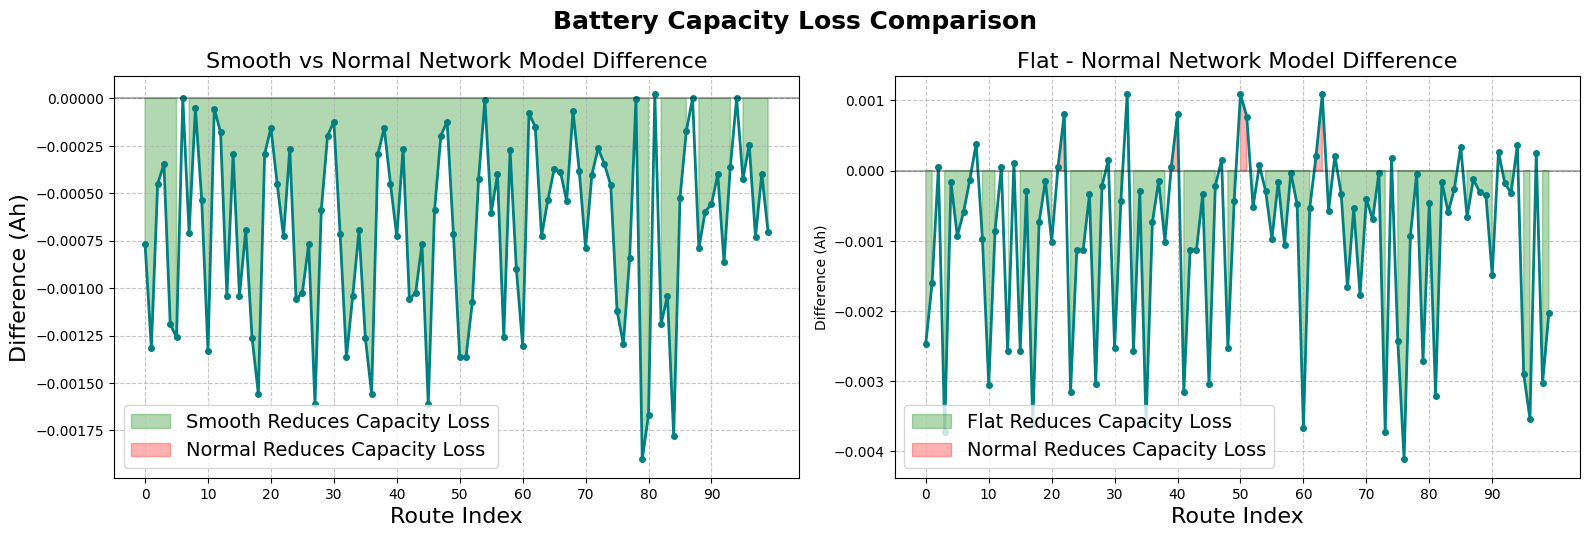

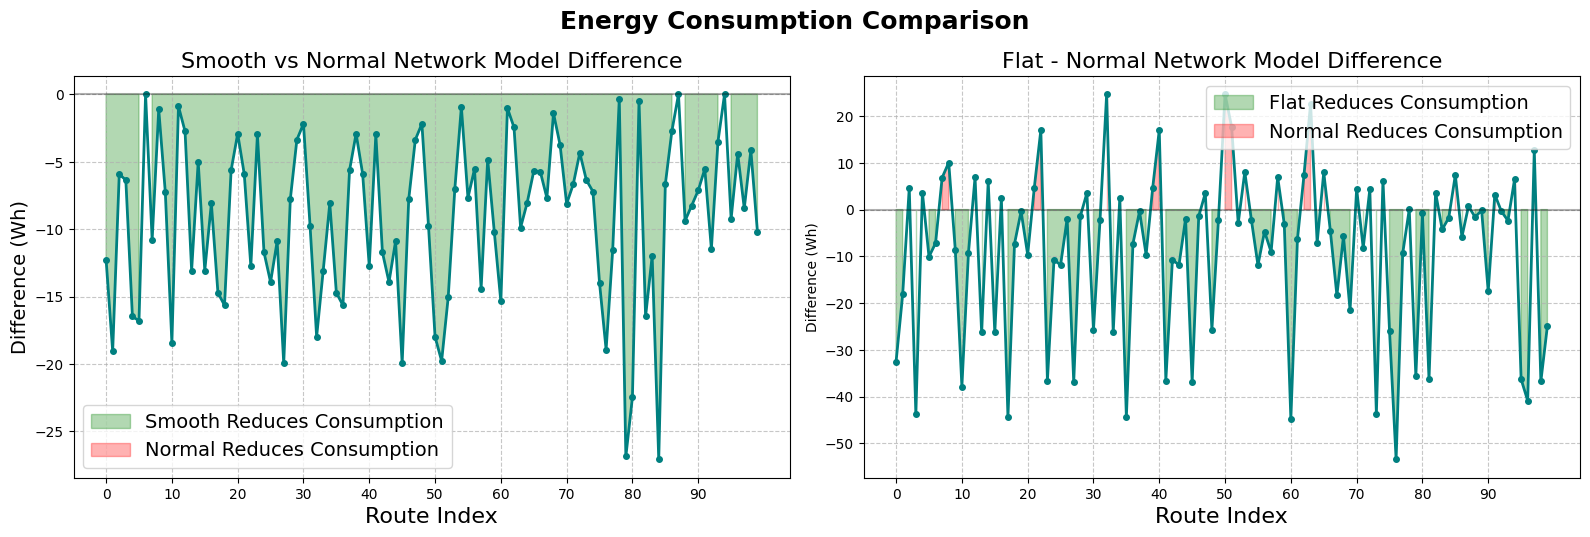

In [126]:
plot_results('capacity',normal_capacity_losses,flat_capacity_losses, smooth_capacity_losses)
plot_results('consumption',normal_consumptions,flat_consumptions, smooth_consumptions)


In [134]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_complex_results(type: str, normal_list: list, flat_list: list, smooth_list: list):
    """
    Plot comparison results and calculate statistical metrics for the differences
    between normal, flat, and smooth road models.
    
    Parameters:
    -----------
    type : str
        Type of data being plotted ('capacity' or 'consumption')
    normal_list : list
        Values from the normal road model
    flat_list : list
        Values from the flat road model
    smooth_list : list
        Values from the smooth road model (no stationary starts)
    """
    # Convert your lists to numpy arrays if they aren't already
    normal = np.array(normal_list)
    flat = np.array(flat_list)
    smooth = np.array(smooth_list)
    
    # Calculate differences
    diff_smooth = smooth - normal
    diff_flat = flat - normal
    
    # Calculate percentage differences
    pct_diff_smooth = (diff_smooth / normal) * 100
    pct_diff_flat = (diff_flat / normal) * 100
    
    # Calculate statistical metrics
    metrics = {
        'smooth_vs_normal': {
            'mean_diff': np.mean(diff_smooth),
            'median_diff': np.median(diff_smooth),
            'std_diff': np.std(diff_smooth),
            'mean_pct_diff': np.mean(pct_diff_smooth),
            'median_pct_diff': np.median(pct_diff_smooth),
            'routes_with_reduction': sum(diff_smooth < 0),
            'total_routes': len(diff_smooth),
            'pct_routes_with_reduction': (sum(diff_smooth < 0) / len(diff_smooth)) * 100,
            'max_reduction': np.min(diff_smooth),
            'max_increase': np.max(diff_smooth)
        },
        'flat_vs_normal': {
            'mean_diff': np.mean(diff_flat),
            'median_diff': np.median(diff_flat),
            'std_diff': np.std(diff_flat),
            'mean_pct_diff': np.mean(pct_diff_flat),
            'median_pct_diff': np.median(pct_diff_flat),
            'routes_with_reduction': sum(diff_flat < 0),
            'total_routes': len(diff_flat),
            'pct_routes_with_reduction': (sum(diff_flat < 0) / len(diff_flat)) * 100,
            'max_reduction': np.min(diff_flat),
            'max_increase': np.max(diff_flat)
        }
    }
    
    # Calculate confidence intervals (95%)
    metrics['smooth_vs_normal']['ci_95'] = stats.norm.interval(0.95, 
                                                             loc=metrics['smooth_vs_normal']['mean_diff'], 
                                                             scale=metrics['smooth_vs_normal']['std_diff']/np.sqrt(len(diff_smooth)))
    metrics['flat_vs_normal']['ci_95'] = stats.norm.interval(0.95, 
                                                           loc=metrics['flat_vs_normal']['mean_diff'], 
                                                           scale=metrics['flat_vs_normal']['std_diff']/np.sqrt(len(diff_flat)))
    
    # Perform paired t-tests to assess statistical significance
    smooth_t_stat, smooth_p_value = stats.ttest_rel(smooth, normal)
    flat_t_stat, flat_p_value = stats.ttest_rel(flat, normal)
    
    metrics['smooth_vs_normal']['t_stat'] = smooth_t_stat
    metrics['smooth_vs_normal']['p_value'] = smooth_p_value
    metrics['flat_vs_normal']['t_stat'] = flat_t_stat
    metrics['flat_vs_normal']['p_value'] = flat_p_value
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    title_map = {
        'capacity': 'Battery Capacity Loss Comparison',
        'consumption': 'Energy Consumption Comparison'
    }
    
    ylabel_map = {
        'capacity': 'Difference (Ah)',
        'consumption': 'Difference (Wh)'
    }
    
    legend_map = {
        'capacity': ['Reduces Capacity Loss', 'Increases Capacity Loss'],
        'consumption': ['Reduces Consumption', 'Increases Consumption']
    }
    
    fig.suptitle(title_map.get(type, 'Comparison'), fontsize=18, fontweight='bold')
    
    # Subplot 1: Smooth - Normal difference
    x = np.arange(len(normal))
    ax1.plot(x, diff_smooth, '.-', color='teal', linewidth=2, markersize=8)
    ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax1.set_title('Smooth vs Normal Network Model Difference', fontsize=16)
    ax1.set_xlabel('Route Index', fontsize=14)
    ax1.set_ylabel(ylabel_map.get(type, 'Difference'), fontsize=14)
    ax1.set_xticks(x[::10])
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Add fill between where appropriate
    ax1.fill_between(x, diff_smooth, 0, where=(diff_smooth < 0), color='green', alpha=0.3, 
                     label=f'Smooth {legend_map.get(type, ["Reduces", "Increases"])[0]}')
    ax1.fill_between(x, diff_smooth, 0, where=(diff_smooth >= 0), color='red', alpha=0.3, 
                    label=f'Normal {legend_map.get(type, ["Reduces", "Increases"])[0]}')
    ax1.legend(fontsize=12)
    
    # Subplot 2: Flat - Normal difference
    ax2.plot(x, diff_flat, '.-', color='teal', linewidth=2, markersize=8)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax2.set_title('Flat vs Normal Network Model Difference', fontsize=16)
    ax2.set_xlabel('Route Index', fontsize=14)
    ax2.set_ylabel(ylabel_map.get(type, 'Difference'), fontsize=14)
    ax2.set_xticks(x[::10])
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Add fill between where appropriate
    ax2.fill_between(x, diff_flat, 0, where=(diff_flat < 0), color='green', alpha=0.3, 
                     label=f'Flat {legend_map.get(type, ["Reduces", "Increases"])[0]}')
    ax2.fill_between(x, diff_flat, 0, where=(diff_flat >= 0), color='red', alpha=0.3, 
                    label=f'Normal {legend_map.get(type, ["Reduces", "Increases"])[0]}')
    ax2.legend(fontsize=12)
    
    # Adding a text box with key statistics
    smooth_stats = (
        f"Smooth vs Normal:\n"
        f"Mean diff: {metrics['smooth_vs_normal']['mean_diff']:.2f} {ylabel_map.get(type, '').split(' ')[1][:-1]}\n"
        f"Mean % diff: {metrics['smooth_vs_normal']['mean_pct_diff']:.2f}%\n"
        f"Routes with reduction: {metrics['smooth_vs_normal']['routes_with_reduction']}/{metrics['smooth_vs_normal']['total_routes']} "
        f"({metrics['smooth_vs_normal']['pct_routes_with_reduction']:.1f}%)\n"
        f"p-value: {metrics['smooth_vs_normal']['p_value']:.4f}" + 
        (f" (significant)" if metrics['smooth_vs_normal']['p_value'] < 0.05 else "")
    )
    
    flat_stats = (
        f"Flat vs Normal:\n"
        f"Mean diff: {metrics['flat_vs_normal']['mean_diff']:.2f} {ylabel_map.get(type, '').split(' ')[1][:-1]}\n"
        f"Mean % diff: {metrics['flat_vs_normal']['mean_pct_diff']:.2f}%\n"
        f"Routes with reduction: {metrics['flat_vs_normal']['routes_with_reduction']}/{metrics['flat_vs_normal']['total_routes']} "
        f"({metrics['flat_vs_normal']['pct_routes_with_reduction']:.1f}%)\n"
        f"p-value: {metrics['flat_vs_normal']['p_value']:.4f}" + 
        (f" (significant)" if metrics['flat_vs_normal']['p_value'] < 0.05 else "")
    )
    
    # # Add textboxes to the plots
    # props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # ax1.text(0.05, 0.05, smooth_stats, transform=ax1.transAxes, fontsize=10,
    #          verticalalignment='bottom', bbox=props)
    
    # ax2.text(0.05, 0.05, flat_stats, transform=ax2.transAxes, fontsize=10,
    #          verticalalignment='bottom', bbox=props)
    
    plt.tight_layout()
    plt.savefig(f'sensitivity_study_{type}.jpg', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print detailed statistics for inclusion in papers/reports
    print(f"\n--- Detailed Statistics for {type.capitalize()} Comparison ---")
    print("\nSmooth vs Normal:")
    for key, value in metrics['smooth_vs_normal'].items():
        if key == 'ci_95':
            print(f"  95% Confidence Interval: [{value[0]:.4f}, {value[1]:.4f}]")
        else:
            print(f"  {key}: {value}")
    
    print("\nFlat vs Normal:")
    for key, value in metrics['flat_vs_normal'].items():
        if key == 'ci_95':
            print(f"  95% Confidence Interval: [{value[0]:.4f}, {value[1]:.4f}]")
        else:
            print(f"  {key}: {value}")
    
    return metrics

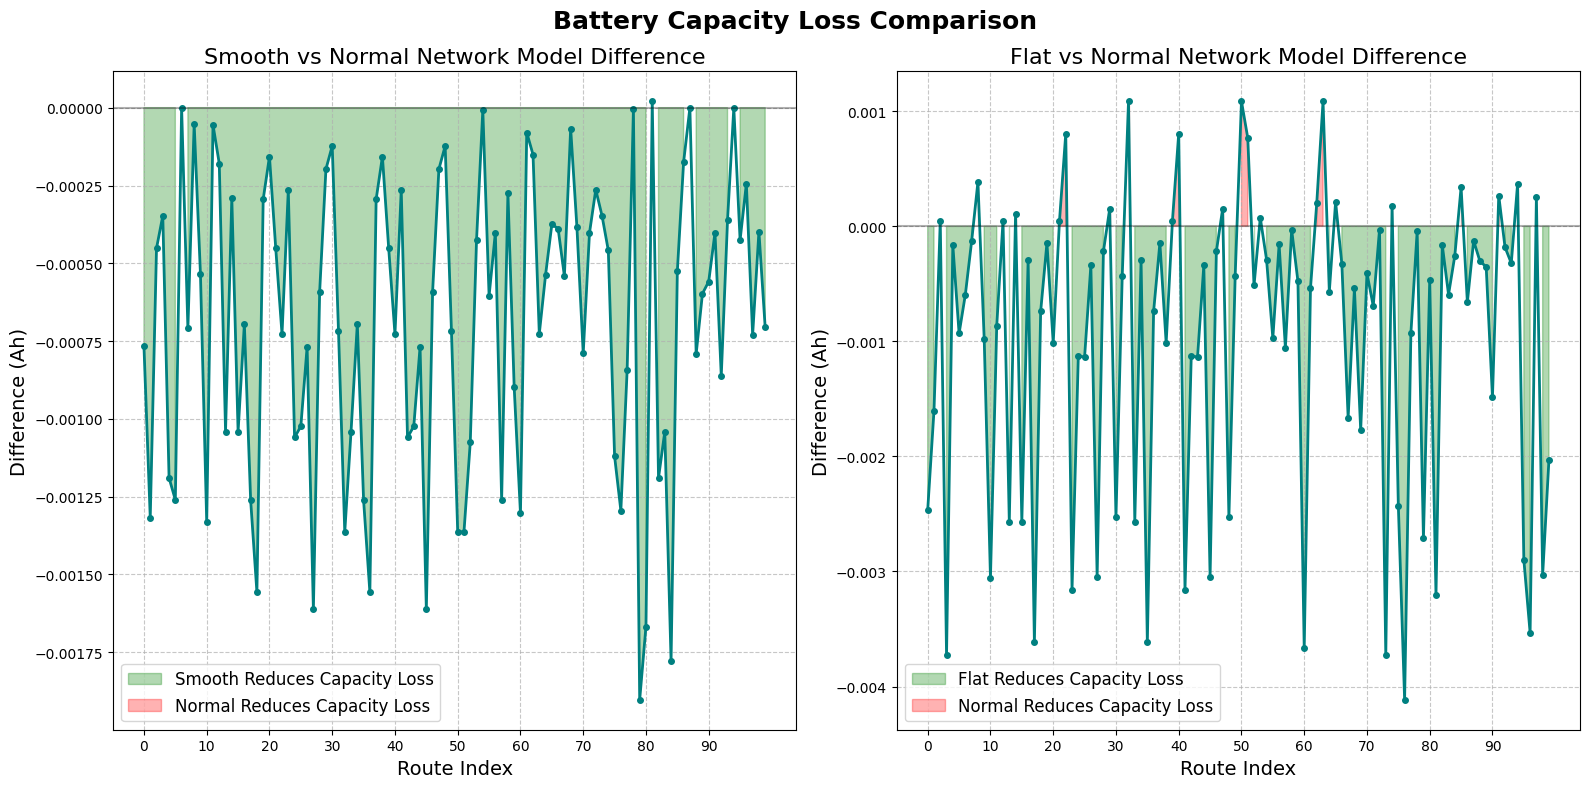


--- Detailed Statistics for Capacity Comparison ---

Smooth vs Normal:
  mean_diff: -0.0006806446573161348
  median_diff: -0.0005941182552830471
  std_diff: 0.000477653846971331
  mean_pct_diff: -18.694115468706308
  median_pct_diff: -18.699162199935408
  routes_with_reduction: 96
  total_routes: 100
  pct_routes_with_reduction: 96.0
  max_reduction: -0.0019032561587507997
  max_increase: 2.1003749446774946e-05
  95% Confidence Interval: [-0.0008, -0.0006]
  t_stat: -14.178319455761494
  p_value: 1.4208677694878728e-25

Flat vs Normal:
  mean_diff: -0.0009650010076807285
  median_diff: -0.0004963423051158433
  std_diff: 0.0013077295819619772
  mean_pct_diff: -14.601491089333514
  median_pct_diff: -15.098893183788679
  routes_with_reduction: 78
  total_routes: 100
  pct_routes_with_reduction: 78.0
  max_reduction: -0.004115504245608906
  max_increase: 0.0010873991202267654
  95% Confidence Interval: [-0.0012, -0.0007]
  t_stat: -7.3422203847146035
  p_value: 5.976672541976956e-11


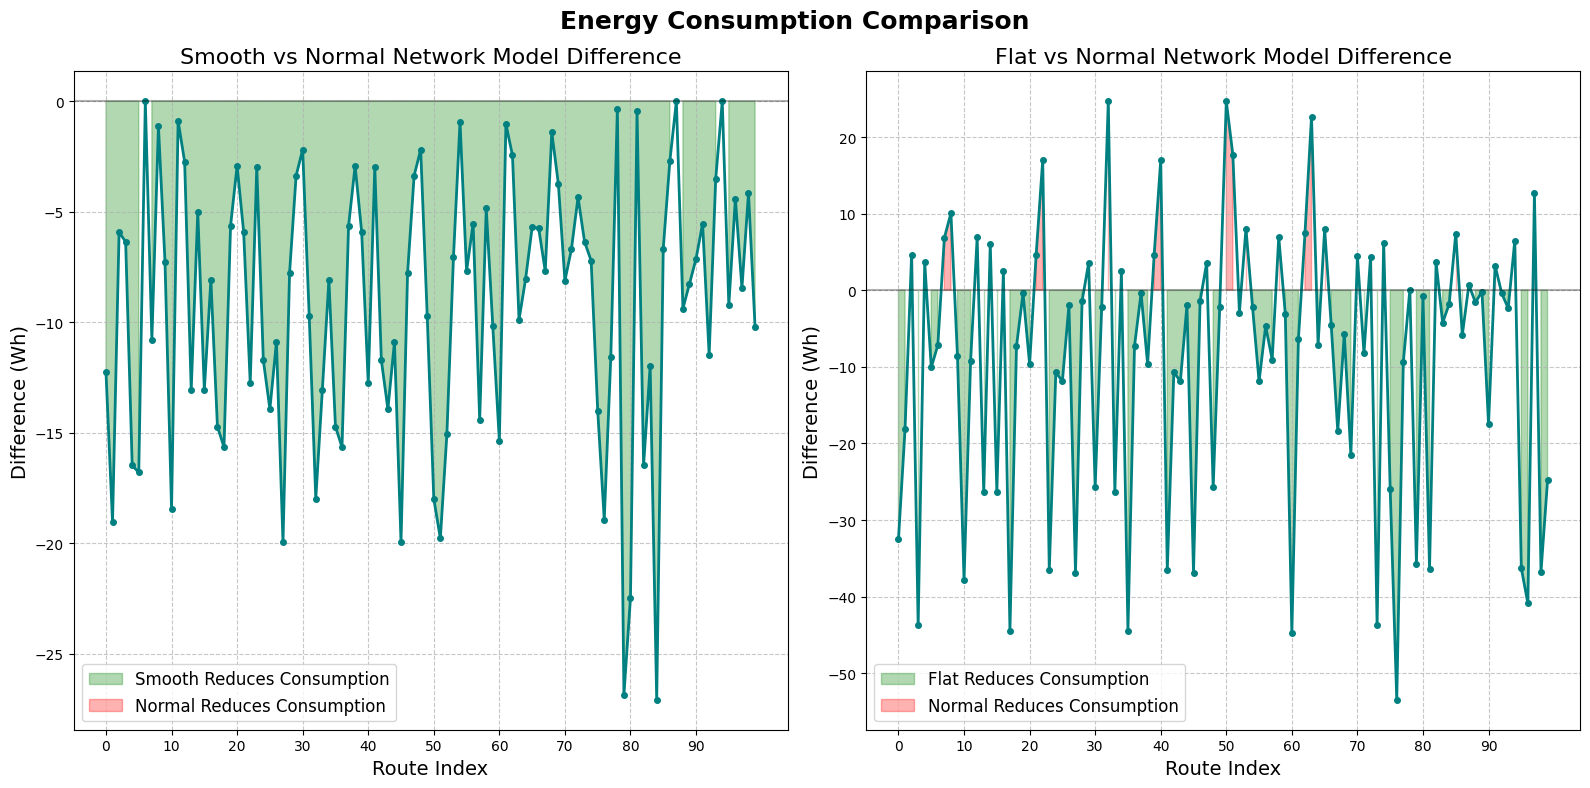


--- Detailed Statistics for Consumption Comparison ---

Smooth vs Normal:
  mean_diff: -9.151766213134605
  median_diff: -8.063284150294265
  std_diff: 6.090858675744397
  mean_pct_diff: -15.416015514314022
  median_pct_diff: -13.739083310216776
  routes_with_reduction: 97
  total_routes: 100
  pct_routes_with_reduction: 97.0
  max_reduction: -27.078635919163702
  max_increase: 0.0
  95% Confidence Interval: [-10.3456, -7.9580]
  t_stat: -14.950096356147808
  p_value: 3.90956085106888e-27

Flat vs Normal:
  mean_diff: -8.902439990006501
  median_diff: -4.372041154820217
  std_diff: 17.60946770030264
  mean_pct_diff: -5.529845244175221
  median_pct_diff: -9.5204356521704
  routes_with_reduction: 68
  total_routes: 100
  pct_routes_with_reduction: 68.0
  max_reduction: -53.47391201791696
  max_increase: 24.673931570109403
  95% Confidence Interval: [-12.3538, -5.4510]
  t_stat: -5.030144068182037
  p_value: 2.1899464279200137e-06


{'smooth_vs_normal': {'mean_diff': np.float64(-9.151766213134605),
  'median_diff': np.float64(-8.063284150294265),
  'std_diff': np.float64(6.090858675744397),
  'mean_pct_diff': np.float64(-15.416015514314022),
  'median_pct_diff': np.float64(-13.739083310216776),
  'routes_with_reduction': np.int64(97),
  'total_routes': 100,
  'pct_routes_with_reduction': np.float64(97.0),
  'max_reduction': np.float64(-27.078635919163702),
  'max_increase': np.float64(0.0),
  'ci_95': (np.float64(-10.34555257707284), np.float64(-7.957979849196371)),
  't_stat': np.float64(-14.950096356147808),
  'p_value': np.float64(3.90956085106888e-27)},
 'flat_vs_normal': {'mean_diff': np.float64(-8.902439990006501),
  'median_diff': np.float64(-4.372041154820217),
  'std_diff': np.float64(17.60946770030264),
  'mean_pct_diff': np.float64(-5.529845244175221),
  'median_pct_diff': np.float64(-9.5204356521704),
  'routes_with_reduction': np.int64(68),
  'total_routes': 100,
  'pct_routes_with_reduction': np.floa

In [135]:
plot_complex_results('capacity',normal_capacity_losses,flat_capacity_losses, smooth_capacity_losses)
plot_complex_results('consumption',normal_consumptions,flat_consumptions, smooth_consumptions)